In [2]:
import sys
sys.path.insert(0, "../../python")

jarfile = "../../target/salsa3d-software-1.2022.5-jar-with-dependencies.jar"

from PyPCalc import PCalc
PCalc.print_example03_info()


Example 3 showcases the output grid functionality
Key properties include:
inputType = 'grid'
gridRangeLat = '15 45 16' # sets min, max, and N latitudes
gridRangeLon = '70 110 21' # sets min, max and N longitudes
depthSpecificationMethod = 'depths' # see ex2 or the manual for more on depth specification
depths = '100.0, 200.0' # Set of depths to compute the grids in lat/lon for



In [8]:
config = PCalc.initialize_configuration(captureOutput=True, use_slbm=False, returnObject='array',
                jarFile = jarfile)

props = PCalc.initialize_properties(
    application = 'model_query',
    workDir = '.',
    geotessModel="../data/AK135.geotess",
    inputType = 'grid',
    gridRangeLat = "15 45 16",
    gridRangeLon = "70 110 21",
    depthSpecificationMethod = 'depths',
    depths = "100.0, 200.0",
    outputType = 'file',
    outputFile = "<property:workDir>/pcalc_query_grid_output.dat",
    logFile = "<property:workDir>/pcalc_log.txt",
    terminalOutput = True,
    outputHeader = True,
    outputFormat = "%1.4f",
    separator = 'tab',
    outputAttributes = 'pslowness')

calc = PCalc(config = config, properties = props)

In [9]:
# Set properties and configuration aspects can be viewed:
print("PCalc properties:")
calc.viewSetProperties()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("PyPCalc Configuration:")
calc.viewSetConfiguration()



PCalc properties:
application = model_query
workDir = .
geotessModel = ../data/AK135.geotess
inputType = grid
batchSize = 1
outputFile = <property:workDir>/pcalc_query_grid_output.dat
logFile = <property:workDir>/pcalc_log.txt
terminalOutput = True
separator = tab
outputAttributes = pslowness
outputHeader = True
depthSpecificationMethod = depths
gridRangeLat = 15 45 16
gridRangeLon = 70 110 21
depths = 100.0, 200.0
outputFormat = %1.4f
outputType = file
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
PyPCalc Configuration:
jarFile = ../../target/salsa3d-software-1.2022.5-jar-with-dependencies.jar
propertiesFile = PCalc.properties
captureOutput = True
propertyFileWritten = False
slbm_libdir = None
use_slbm = False
use_oracle = False
ojdbc_jar = None
returnObject = array
executionMode = Salsa3DSoftware
wallet = None
memoryString = -Xmx256g


In [10]:
# In order to actually run pcalc, first write the properties file and then execute
calc.writePropertiesFile()
r, data = calc.execute()
# The execute method calls the PCalc jar file and returns the terminal output as the first value (r)
# and the data file that is generated as output is read in to Python as the second value (data)

print(r.stdout)

PCalc.1.2022.5.1 running on s1067322 started 2023-02-24 14:23:54 -0700

PCalc.1.2022.5.1 running on s1067322 started 2023-02-24 14:23:54 -0700

Properties:
terminalOutput = True
depthSpecificationMethod = depths
propertyFile = /Users/rwporri/src/Salsa3DSoftware_Py/Salsa3DSoftware-master/Examples/Notebooks/PCalc.properties
geotessModel = ../data/AK135.geotess
outputType = file
gridRangeLon = 70 110 21
separator = tab
gridRangeLat = 15 45 16
outputFile = <property:workDir>/pcalc_query_grid_output.dat
outputAttributes = pslowness
application = model_query
outputHeader = True
logFile = <property:workDir>/pcalc_log.txt
depths = 100.0, 200.0
inputType = grid
workDir = .
batchSize = 1
outputFormat = %1.4f

Application = queryModel

Reading GeoModel /Users/rwporri/src/Salsa3DSoftware_Py/Salsa3DSoftware-master/Examples/data/AK135.geotess
Reading geotessModel took  3.319098 seconds
********************************************************************************
GeoTessModel.1.2022.5.1
OS: MacOSX

In [11]:
# This case we output an array. It's a little less nicely organized, but it is easy to send to other tools
# like matplotlib
data

array([[7.000e+01, 1.500e+01, 1.000e+02, 1.243e-01],
       [7.000e+01, 1.500e+01, 2.000e+02, 1.209e-01],
       [7.200e+01, 1.500e+01, 1.000e+02, 1.243e-01],
       ...,
       [1.080e+02, 4.500e+01, 2.000e+02, 1.209e-01],
       [1.100e+02, 4.500e+01, 1.000e+02, 1.243e-01],
       [1.100e+02, 4.500e+01, 2.000e+02, 1.209e-01]])

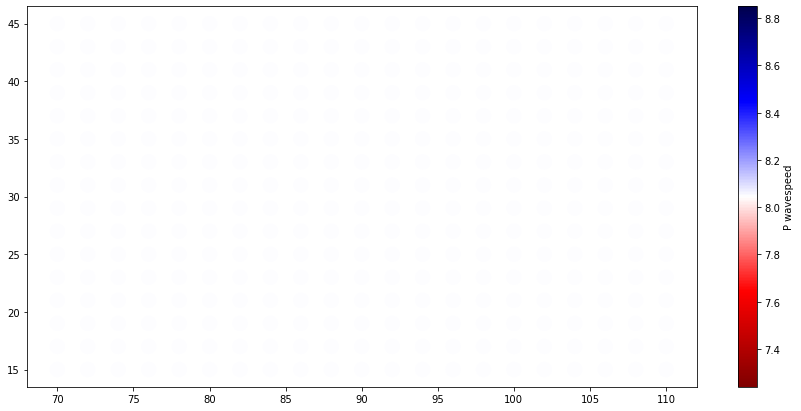

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# initialize the figure
plt.figure(figsize=(15,7))

# Just gets the 100 km depth slice
idx = np.where(data[:,2] == 100)

# Uses scatter to plot. Note that this looks a little weird because it's a postage stamp on the earth
# and this doesn't have any geographic references
plt.scatter(data[idx,0], data[idx,1], c=1.0/data[idx,3], cmap='seismic_r', s=200)
plt.colorbar(label='P wavespeed')
plt.show()